In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patheffects

In [2]:
def plot_R2_std_against_avg(TARGET, CONFIG):
    
    df = pd.read_pickle(f"../results/overall_metrics--{TARGET}.pickle")
    df = df[df.config == CONFIG]
    df = df.set_index("model")
    
    avg = df[df.index.str.contains("Average")].iloc[0].copy()
    ens = df[df.index.str.contains("Ensemble")].iloc[0].copy()

    df = df.drop(index = [
        "▸ Average",
        # "▸ Ensemble"
    ])
    df = df.sort_values("R2", ascending=False)

    df["idx"] = range(len(df))    
    fig, ax = plt.subplots(figsize=(10,7))


    # ==========================================
    # horizontal zero line
    # ax.hlines(
    #     0,
    #     -1,len(df),
    #     color="k",
    #     ls="-",
    #     lw=1,
    # )

    # ==========================================
    # horizontal Average R2 line
    color = "tab:blue"

    ax.hlines(
        avg.R2,
        -1,len(df),
        color=color,
        ls="--",
        lw=2,
        label = "Average R2",
    )
    ax.text(
        y=avg.R2,
        x=len(df)-0.2,
        s="Average R2 of all\nindividual models",
        path_effects=[patheffects.withStroke(linewidth=4, foreground="w")],
        fontsize="large",
        ha="right",
        va="bottom",
        color = color,
    )

    # ==========================================
    # model performance (points)
    

    ax.vlines(
        df.idx,
        ymin = [avg.R2]*len(df),
        ymax = df.R2,
        color = ["green" if num>0 else "tomato" for num in df.R2-avg.R2],
        ls = "-",
        lw=11,
        alpha=.5,
    )
    
    ax.plot(
        df.idx,
        df.R2,
        label="R2",
        color="k",
        
        ls="",
        marker="s",
        markersize=10,
        lw=2,
    )

    

    # ==========================================
    # model performance (text)
    ymin, ymax = ax.get_ylim()
    eps = (ymax-ymin)*0.03
    
    for _, row in df.iterrows():

        num = row.R2 - avg.R2
        txt = f"+{num:.2f}" if num>0 else f"−{abs(num):.2f}"
        ax.text(
            x = row.idx, y=row.R2+1.5*eps if num<0 else row.R2-1.5*eps, va="center", ha="center",
            s=txt,
            fontsize="large",
            color="green" if num>0 else "tomato",
            fontweight="bold",
            path_effects=[patheffects.withStroke(linewidth=3, foreground="w")]
        )

    # ax.legend()
    yticks = ax.get_yticks()[1:-1]
    ax.set_yticks(yticks, [f"{x:.2f}" for x in yticks], fontsize="x-large")
    ax.set_xticks(df.idx, df.index, rotation=90, fontsize="x-large")

    ax.set_xlim(-1, len(df))

    ax.set_title(f"R2 for {TARGET} estimation - {CONFIG}", fontsize="xx-large", fontweight="bold")

    # plt.grid()
    plt.tight_layout()
    
    return ax


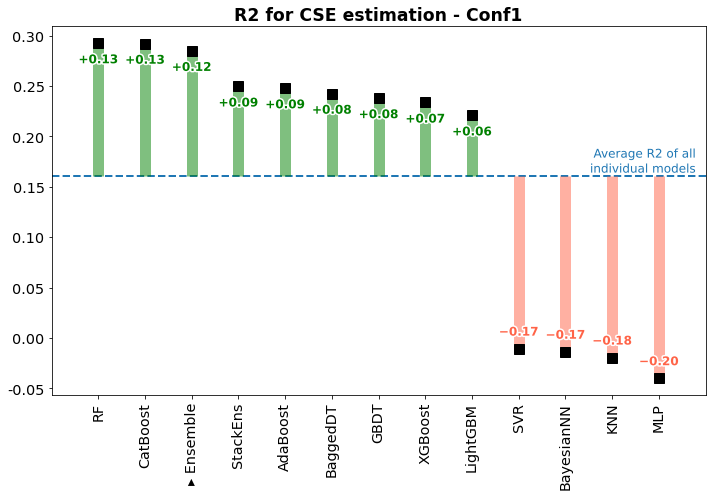

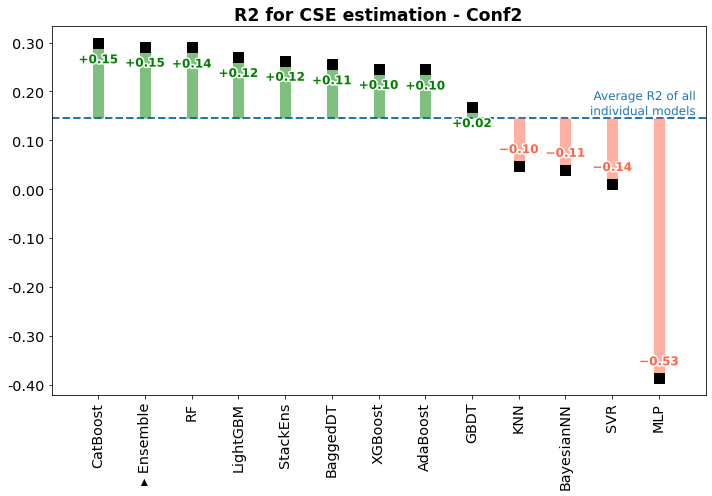

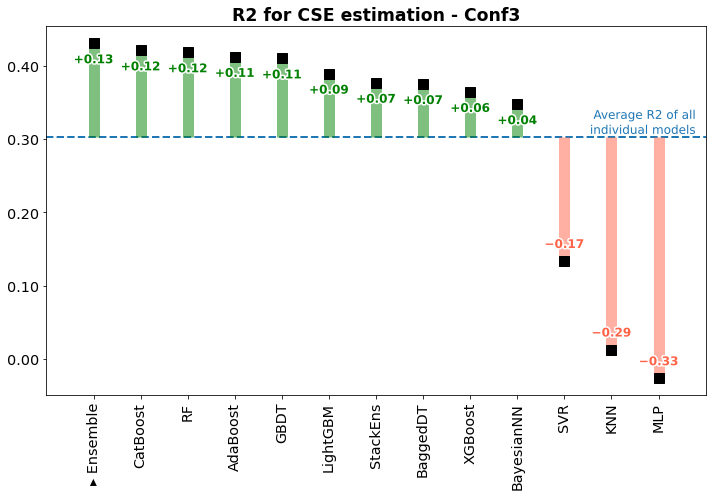

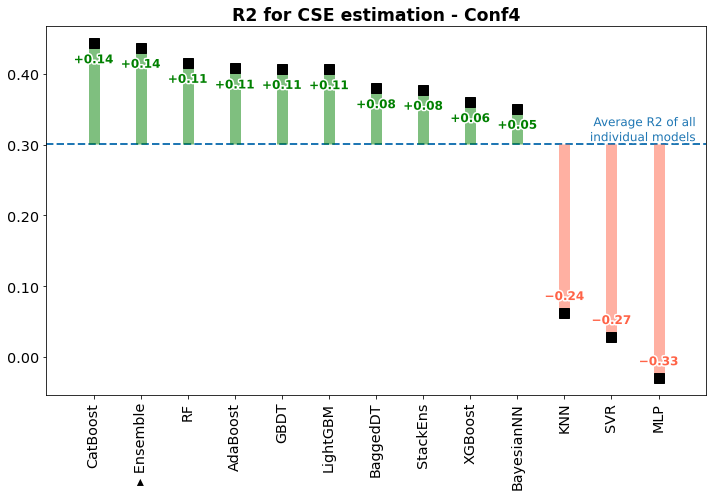

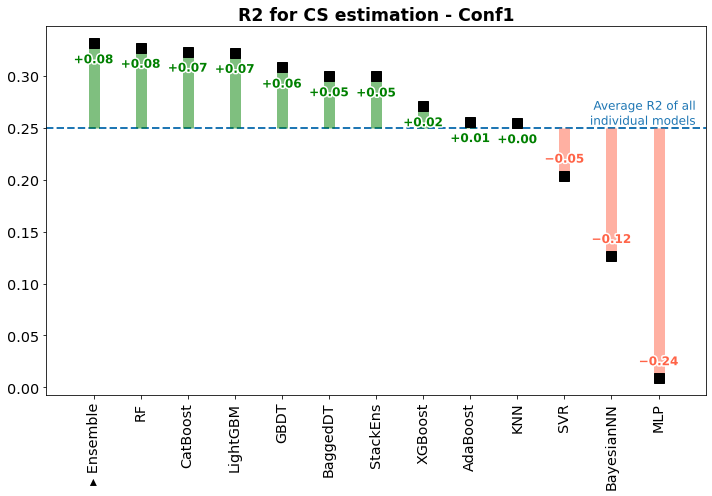

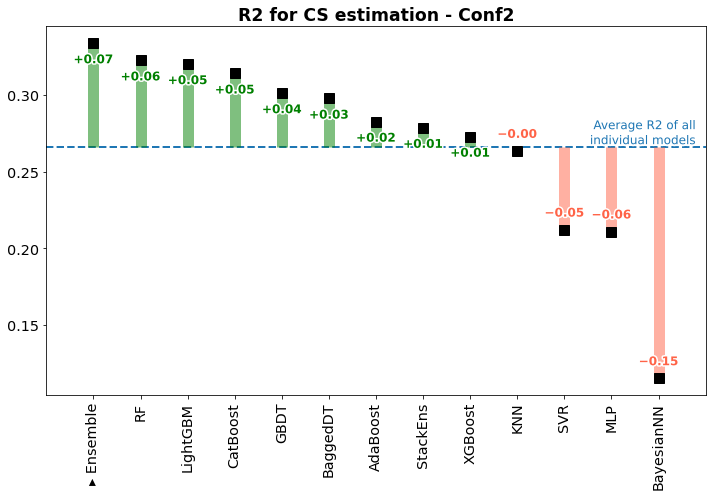

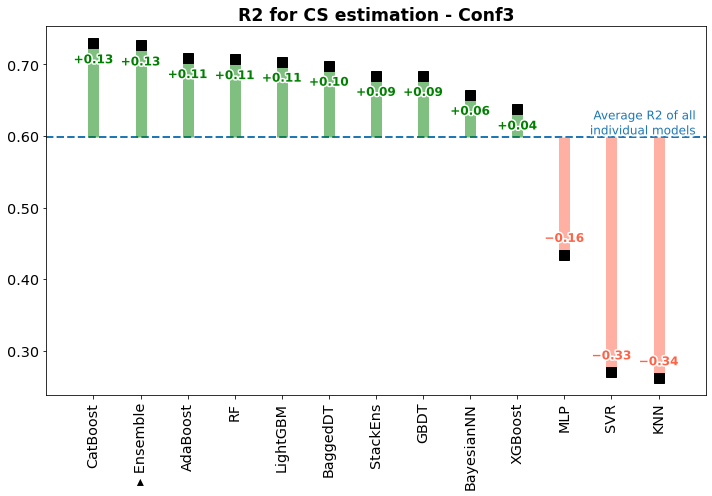

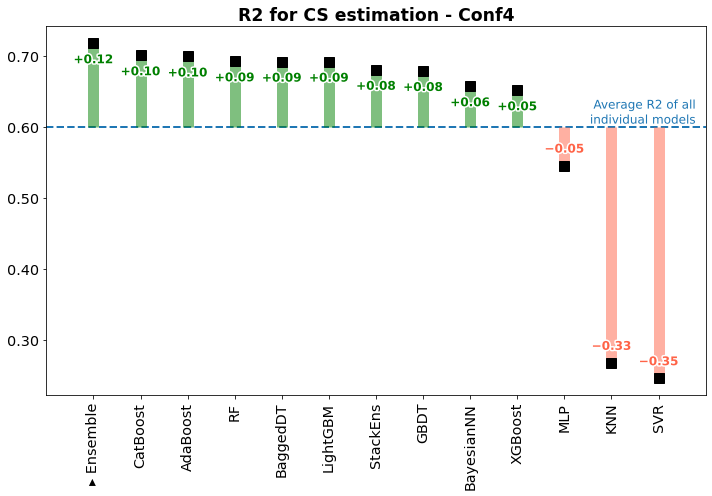

In [3]:
for TARGET in [
    "CSE",
    "CS",
]:
    for CONFIG in [
        "Conf1",
        "Conf2",
        "Conf3",
        "Conf4",
    ]:
        plot_R2_std_against_avg(TARGET, CONFIG)
        plt.savefig(f"../figures_and_tables/figure_performance_comparison_{TARGET}_{CONFIG}.png", dpi=200)
        plt.show()